In [40]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

 Collection and Processing

In [2]:
#print names of files in ML_assignment folder
print(os.listdir())

['.config', 'Used_car_prices_in_Pakistan 2021_rawD.csv', 'sample_data']


In [3]:
#import data-set
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv")

In [4]:
#first five rows
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019.0,1500.0,Imported,2000.0,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019.0,660.0,Imported,68000.0,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015.0,1800.0,Local,70000.0,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014.0,1500.0,Imported,99900.0,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017.0,1300.0,Local,55000.0,Islamabad,Manual


In [5]:
#last five rows
df.tail()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
13458,Suzuki,Cultus,VXR,650000.0,2007.0,1000.0,Local,75000.0,Lahore,Manual
13459,Suzuki,Liana,RXi,815000.0,2006.0,1300.0,Local,113500.0,Islamabad,Manual
13460,Toyota,Corolla,XLi VVTi,2500000.0,2015.0,1300.0,Local,60000.0,Islamabad,Manual
13461,Toyota,Corolla,GLi 1.3 VVTi,Call for price,2017.0,1300.0,Local,46000.0,Karachi,Manual
13462,Daihatsu,Move,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#shape of the dataset
df.shape

(13463, 10)

In [37]:
#get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13463 entries, 0 to 13462
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             13463 non-null  object 
 1   Model            13463 non-null  object 
 2   Version          13463 non-null  object 
 3   Price            13462 non-null  object 
 4   Make_Year        13462 non-null  float64
 5   CC               13462 non-null  float64
 6   Assembly         13462 non-null  float64
 7   Mileage          13462 non-null  float64
 8   Registered City  13462 non-null  object 
 9   Transmission     13462 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


# Data Cleaning : Detecting NAN values

In [12]:
#Number of null value
df.isnull().sum()

Make                 0
Model                0
Version            956
Price                1
Make_Year            1
CC                   1
Assembly             1
Mileage              1
Registered City      1
Transmission         1
dtype: int64

# Detecting null values

In [14]:
missing_value=["NaN",np.nan]
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv", na_values=missing_value)

In [13]:
df.isnull().any()

Make               False
Model              False
Version             True
Price               True
Make_Year           True
CC                  True
Assembly            True
Mileage             True
Registered City     True
Transmission        True
dtype: bool

In [15]:
#Number of null value
df.isnull().sum()

Make                 0
Model                0
Version            956
Price                1
Make_Year            1
CC                   1
Assembly             1
Mileage              1
Registered City      1
Transmission         1
dtype: int64

In [16]:
# Mean value % in null values
df.isnull().mean()

Make               0.000000
Model              0.000000
Version            0.071009
Price              0.000074
Make_Year          0.000074
CC                 0.000074
Assembly           0.000074
Mileage            0.000074
Registered City    0.000074
Transmission       0.000074
dtype: float64

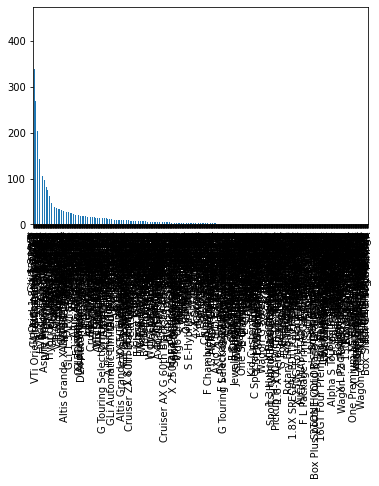

In [17]:
df['Version'].value_counts().plot.bar()

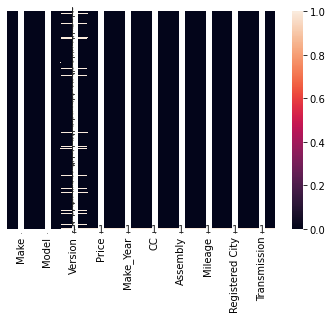

In [18]:
#display null values using graph
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

# Add mean value in 'version' variable to the null values

In [19]:
df['Version'].mode()

0    GLi 1.3 VVTi
dtype: object

In [20]:
df['Version'].fillna('GLi 1.3 VVTi', inplace=True)

In [21]:
df['Version'].isnull().sum()

0

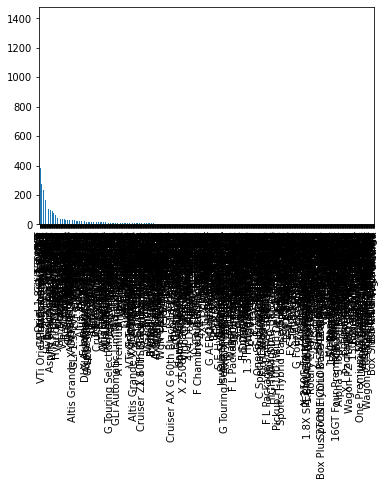

In [22]:
df['Version'].value_counts().plot.bar()

# Data Preprocessing

### 3.1 CategoricalEncoder

In [26]:
#categorical data distridution illustration
print(df.Transmission.value_counts())
print(df.Assembly.value_counts())

Automatic    8612
Manual       4850
Name: Transmission, dtype: int64
Local       8243
Imported    5219
Name: Assembly, dtype: int64


In [27]:
#encoding the "Transmission" Column
df.replace({'Transmission':{'Automatic':0,'Manual':1}},inplace=True)

#encoding the "Assembly" Column
df.replace({'Assembly':{'Local':0,'Imported':1}},inplace=True)

In [28]:
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,GLi 1.3 VVTi,7400000.0,2019.0,1500.0,1.0,2000.0,Un-Registered,0.0
1,Mitsubishi,Minica,Black Minica,1065000.0,2019.0,660.0,1.0,68000.0,Lahore,0.0
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015.0,1800.0,0.0,70000.0,Lahore,0.0
3,Toyota,Aqua,G,2375000.0,2014.0,1500.0,1.0,99900.0,Islamabad,0.0
4,Honda,City,1.3 i-VTEC,2600000.0,2017.0,1300.0,0.0,55000.0,Islamabad,1.0


### Spliting the data into Traning data and Testing data.

In [29]:
X = df.drop(['Price'],axis=1)
Y = df['Price']

In [30]:
print(X)

             Make    Model                          Version  Make_Year  \
0           Honda  Insight                     GLi 1.3 VVTi     2019.0   
1      Mitsubishi   Minica                     Black Minica     2019.0   
2            Audi       A6  1.8 TFSI Business Class Edition     2015.0   
3          Toyota     Aqua                                G     2014.0   
4           Honda     City                       1.3 i-VTEC     2017.0   
...           ...      ...                              ...        ...   
13458      Suzuki   Cultus                              VXR     2007.0   
13459      Suzuki    Liana                              RXi     2006.0   
13460      Toyota  Corolla                         XLi VVTi     2015.0   
13461      Toyota  Corolla                     GLi 1.3 VVTi     2017.0   
13462    Daihatsu     Move                     GLi 1.3 VVTi        NaN   

           CC  Assembly   Mileage Registered City  Transmission  
0      1500.0       1.0    2000.0   Un-Regist

In [31]:
print(Y)

0             7400000.0
1             1065000.0
2             9300000.0
3             2375000.0
4             2600000.0
              ...      
13458          650000.0
13459          815000.0
13460         2500000.0
13461    Call for price
13462               NaN
Name: Price, Length: 13463, dtype: object


### Splitting Traning and Testing data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

### Traning Model

## 1.Linear Regression

In [44]:
#loading the linear regression model
lin_reg_model = LinearRegression()

# 3.1 LableEncoder

In [ ]:
# data types in each colunm
df.dtypes

Make               object
Model              object
Version            object
Price              object
Make_Year           int64
CC                  int64
Assembly           object
Mileage             int64
Registered City    object
Transmission       object
dtype: object

# 3.1.1 LableEncoding an 'Make' variable (one-hot encoding)

In [ ]:
df['Make'].unique()

array(['Honda', 'Mitsubishi', 'Audi', 'Toyota', 'Daihatsu', 'Suzuki',
       'MG', 'KIA', 'Hyundai', 'Land', 'Mercedes', 'Changan', 'Nissan',
       'Subaru', 'Lexus', 'FAW', 'Range', 'Volkswagen', 'Chevrolet',
       'Ford', 'Proton', 'BMW', 'Mazda', 'Isuzu', 'Adam', 'Others',
       'United', 'Prince', 'Porsche', 'Daewoo', 'Chery', 'Daehan',
       'Citroen', 'Hummer', 'Buick', 'Jeep', 'JAC', 'DFSK', 'JMC', 'JW',
       'Tesla', 'ZOTYE', 'Datsun', 'Bentley', 'Master', 'Plymouth',
       'Chrysler', 'Dodge', 'GMC', 'Sogo', 'Volvo', 'Hino', 'Fiat',
       'Jaguar', 'Peugeot', 'SsangYong', 'Cadillac', 'MINI', 'Roma',
       'Sokon', 'Jinbei', 'Golden', 'Renault', 'Dongfeng', 'Rover',
       'Geely'], dtype=object)

In [ ]:
encode = LabelEncoder()

In [ ]:
encode.fit_transform(df['Make'])

array([25, 43,  1, ..., 61, 18, 25])

In [ ]:
df['Make_label']=encode.fit_transform(df['Make'])

In [ ]:
df['Make_label'].value_counts()

61    29793
59    24209
25    15186
14     3016
35     1321
      ...  
34        1
52        1
3         1
54        1
22        1
Name: Make_label, Length: 66, dtype: int64

In [ ]:
df['Make'].value_counts()

Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
            ...  
Jinbei          1
Renault         1
Bentley         1
Rover           1
Geely           1
Name: Make, Length: 66, dtype: int64

# Start one-hot encoding

In [ ]:
add_columns = pd.get_dummies(df['Make'])

In [ ]:
add_columns

,Adam,Audi,BMW,Bentley,Buick,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.join(add_columns)

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Honda,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Suzuki,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,...,0,0,0,1,0,0,0,0,0,0
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,...,0,0,0,1,0,0,0,0,0,0
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.drop(['Make'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage',
       'Registered City', 'Transmission', 'Make_label'],
      dtype='object')

In [ ]:
df = df.join(add_columns)

In [ ]:
df

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,0,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,0,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,0,0,0
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,0,0,0


# 3.1.2 LableEncoding an 'Assembly' variable (one-hot encoding)

In [ ]:
df['Assembly'].unique()

array(['Imported', 'Local'], dtype=object)

In [ ]:
encode = LabelEncoder()

In [ ]:
encode.fit_transform(df['Assembly'])

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
df['Assembly_label']=encode.fit_transform(df['Assembly'])

In [ ]:
df['Assembly_label'].value_counts()

1    54498
0    26074
Name: Assembly_label, dtype: int64

In [ ]:
df['Assembly'].value_counts()

Local       54498
Imported    26074
Name: Assembly, dtype: int64

# Start one-hot encoding

In [ ]:
add_columns = pd.get_dummies(df['Assembly'])

In [ ]:
add_columns

,Imported,Local
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,0,1
80570,0,1


In [ ]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
df.drop(['Assembly'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Transmission', 'Make_label', 'Adam', 'Audi', 'BMW',
       'Bentley', 'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet',
       'Chrysler', 'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'Dodge', 'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden',
       'Hino', 'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW',
       'Jaguar', 'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI',
       'Master', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others',
       'Peugeot', 'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range',
       'Renault', 'Roma', 'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE',
       'Assembly_label'],
      dtype='object')

In [ ]:
df = df.join(add_columns)

In [ ]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,0,0,0,1,0,1


# 3.1.3 LableEncoding an 'Transmission' variable (one-hot encoding)

In [ ]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
encode = LabelEncoder()

In [ ]:
encode.fit_transform(df['Transmission'])

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
df['Transmission_label']=encode.fit_transform(df['Transmission'])

In [ ]:
df['Transmission_label'].value_counts()

0    40408
1    40164
Name: Transmission_label, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Automatic    40408
Manual       40164
Name: Transmission, dtype: int64

# Start one-hot encoding

In [ ]:
add_columns = pd.get_dummies(df['Transmission'])

In [ ]:
add_columns

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,1,0
80570,0,1


In [ ]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,1,0,1,1,0,1


In [ ]:
df.drop(['Transmission'], axis = 1, inplace = True)

In [ ]:
df.columns


Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label'],
      dtype='object')

In [ ]:
df = df.join(add_columns)

In [ ]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Make_label,Adam,Audi,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,25,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,43,0,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,61,0,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,25,0,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,61,0,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,18,0,0,...,0,0,0,0,1,0,1,1,0,1


# 3.2 Standardization

In [ ]:
df.dtypes

Model                 object
Version               object
Price                 object
Make_Year              int64
CC                     int64
                       ...  
Imported               uint8
Local                  uint8
Transmission_label     int32
Automatic              uint8
Manual                 uint8
Length: 80, dtype: object

In [ ]:
#X = df.iloc[:, [3,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,79]]
X = df.iloc[:, [3,4]]
y = df.iloc[:, 2]

In [ ]:
X.head()

,Make_Year,CC
0,2019,1500
1,2019,660
2,2015,1800
3,2014,1500
4,2017,1300


# Seperate dependent and independent variables in dataset

# 1.1 indepepend variable

In [ ]:
x=df[['Make_Year','CC']]


In [ ]:
#Display independent variable
x

,Make_Year,CC
0,2019,1500
1,2019,660
2,2015,1800
3,2014,1500
4,2017,1300
...,...,...
80567,2015,800
80568,2020,660
80569,2016,1300
80570,2013,1000


In [ ]:
x=df[['Make_Year','CC']].values

In [ ]:
#Display independent variable
x

array([[2019, 1500],
       [2019,  660],
       [2015, 1800],
       ...,
       [2016, 1300],
       [2013, 1000],
       [2013, 1800]], dtype=int64)

# 1.2 dependent Variable

In [52]:
y=df[['Price']]

In [53]:
y

,Price
0,7400000.0
1,1065000.0
2,9300000.0
3,2375000.0
4,2600000.0
...,...
13458,650000.0
13459,815000.0
13460,2500000.0
13461,Call for price
